***CUSTOMER CHURN PREDICTION***

---


# Data preprocessing

In [31]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/codsoft/Churn modelling/Churn_Modelling.csv')

df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3405,3406,15793693,Mahomed,694,France,Male,60,9,0.00,1,1,1,57088.97,0
3113,3114,15779529,Grant,620,France,Male,32,7,0.00,2,1,1,34665.79,0
1640,1641,15661528,Ashbolt,583,Spain,Male,47,5,102562.23,1,1,0,92708.10,0
5231,5232,15749519,Lin,822,France,Male,38,6,128289.70,3,1,0,9149.96,1
3344,3345,15654292,Vessels,565,Germany,Male,33,8,130368.31,2,1,0,105642.43,0


Creating dummies for the categorical variable(Geography)

In [32]:
# Create dummy variables for 'Geography'
df_geography_dummies = pd.get_dummies(df['Geography'], prefix='Geography')

# Concatenate the original DataFrame and the dummy variables
df = pd.concat([df, df_geography_dummies], axis=1)

# Drop the original 'Geography' column as it's no longer needed
df.drop('Geography', axis=1, inplace=True)

Label-encoding

In [4]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

Dropping unwanted columns

In [5]:
df = df.drop('RowNumber', axis='columns')
df = df.drop('Surname', axis='columns')
df = df.drop('CustomerId', axis='columns')

Data normalization by feature scaling

In [6]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select the columns to be scaled
columns_to_scale = ['Balance', 'CreditScore', 'EstimatedSalary','Age','Tenure']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

Final cleaned dataset

In [8]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
9602,0.568,0,0.554054,0.3,0.381538,1,0,0,0.489686,1,0,1,0
3528,0.684,1,0.135135,0.5,0.245446,1,1,1,0.350875,0,1,0,0
5946,0.480,1,0.189189,0.9,0.000000,2,1,0,0.694454,0,1,0,0
7707,0.996,1,0.229730,0.5,0.478468,2,1,0,0.423536,0,0,0,1
5339,0.292,0,0.500000,0.4,0.499376,1,1,1,0.157622,1,0,1,0


#Training the model using neural network



In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data preprocessing
X = df.drop('Exited', axis=1).values  # Features
y = df['Exited'].values  # Target variable

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

In [11]:
# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
print(f"Accuracy: {val_accuracy:.4f}")


Epoch 1/30
200/200 [==============================] - 2s 4ms/step - loss: 0.4574 - accuracy: 0.8023 - val_loss: 0.4081 - val_accuracy: 0.8256
Epoch 2/30
200/200 [==============================] - 1s 3ms/step - loss: 0.3959 - accuracy: 0.8306 - val_loss: 0.3734 - val_accuracy: 0.8413
Epoch 3/30
200/200 [==============================] - 1s 4ms/step - loss: 0.3627 - accuracy: 0.8502 - val_loss: 0.3591 - val_accuracy: 0.8456
Epoch 4/30
200/200 [==============================] - 1s 3ms/step - loss: 0.3495 - accuracy: 0.8547 - val_loss: 0.3518 - val_accuracy: 0.8525
Epoch 5/30
200/200 [==============================] - 1s 3ms/step - loss: 0.3424 - accuracy: 0.8584 - val_loss: 0.3504 - val_accuracy: 0.8575
Epoch 6/30
200/200 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8614 - val_loss: 0.3490 - val_accuracy: 0.8544
Epoch 7/30
200/200 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8622 - val_loss: 0.3451 - val_accuracy: 0.8525
Epoch 

In [13]:
# Predict values on the test set
y_pred = model.predict(X_test_scaled)

# Convert the predicted probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute the accuracy on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Optionally, you can print the confusion matrix and classification report for more details
from sklearn.metrics import confusion_matrix, classification_report

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))


32/32 [==============================] - 0s 3ms/step - loss: 0.3514 - accuracy: 0.8600
Test Accuracy: 0.8600

Confusion Matrix:
[[745  40]
 [100 115]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       785
           1       0.74      0.53      0.62       215

    accuracy                           0.86      1000
   macro avg       0.81      0.74      0.77      1000
weighted avg       0.85      0.86      0.85      1000



The F1 score for both the classes is not equal..so checking the distribution of the classes

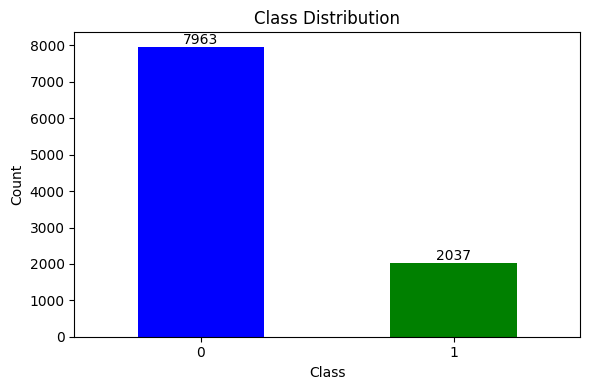

In [15]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each class
class_counts = df['Exited'].value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
bars = class_counts.plot(kind='bar', color=['blue', 'green'])

# Annotate each bar with its count value
for i, count in enumerate(class_counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


#Oversampling

In [8]:
from imblearn.over_sampling import SMOTE

# Create the SMOTE object
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

In [9]:
import numpy as np

# Example value counts of y_resampled
unique_elements, counts = np.unique(y_resampled, return_counts=True)

# Print the unique elements and their counts
for elem, count in zip(unique_elements, counts):
    print(f"{elem}: {count}")

0: 7963
1: 7963


Training the model with the balanced data

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data preprocessing
X = df.drop('Exited', axis=1).values  # Features
y = df['Exited'].values  # Target variable

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
val_loss, val_accuracy = model.evaluate(X_val_scaled, y_val)
print(f"Accuracy: {val_accuracy:.4f}")


Epoch 1/100
319/319 [==============================] - 3s 5ms/step - loss: 0.5626 - accuracy: 0.7160 - val_loss: 0.4985 - val_accuracy: 0.7590
Epoch 2/100
319/319 [==============================] - 2s 6ms/step - loss: 0.4716 - accuracy: 0.7756 - val_loss: 0.4563 - val_accuracy: 0.7802
Epoch 3/100
319/319 [==============================] - 1s 4ms/step - loss: 0.4435 - accuracy: 0.7875 - val_loss: 0.4391 - val_accuracy: 0.7834
Epoch 4/100
319/319 [==============================] - 1s 5ms/step - loss: 0.4315 - accuracy: 0.7991 - val_loss: 0.4349 - val_accuracy: 0.7940
Epoch 5/100
319/319 [==============================] - 1s 4ms/step - loss: 0.4245 - accuracy: 0.8016 - val_loss: 0.4293 - val_accuracy: 0.7896
Epoch 6/100
319/319 [==============================] - 1s 3ms/step - loss: 0.4188 - accuracy: 0.8049 - val_loss: 0.4260 - val_accuracy: 0.8042
Epoch 7/100
319/319 [==============================] - 1s 3ms/step - loss: 0.4130 - accuracy: 0.8084 - val_loss: 0.4244 - val_accuracy: 0.7995

In [28]:
# Predict values on the test set
y_pred = model.predict(X_test_scaled)

# Convert the predicted probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute the accuracy on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Print the confusion matrix and classification report for more details
from sklearn.metrics import confusion_matrix, classification_report

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

50/50 [==============================] - 0s 4ms/step - loss: 0.3533 - accuracy: 0.8675
Test Accuracy: 0.8675

Confusion Matrix:
[[674 135]
 [ 76 708]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       809
           1       0.84      0.90      0.87       784

    accuracy                           0.87      1593
   macro avg       0.87      0.87      0.87      1593
weighted avg       0.87      0.87      0.87      1593



The F1 score is balanced in both the classes

#Visualizing the classification report on the test data

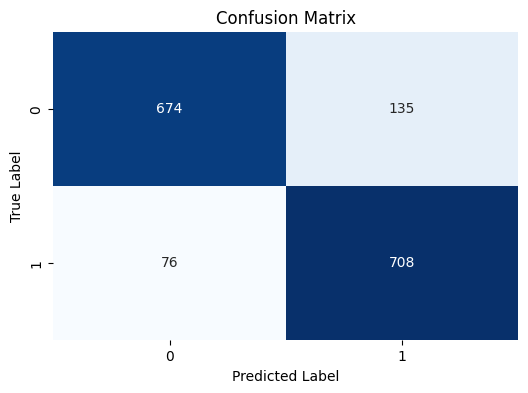

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

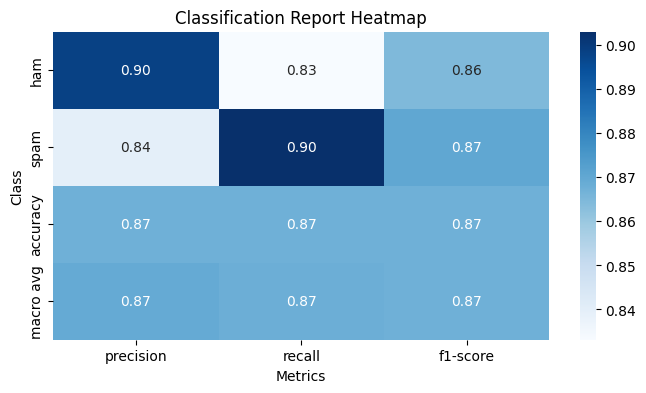

In [22]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate the classification report
report = classification_report(y_test, y_pred_binary, target_names=['ham', 'spam'], output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot the classification report using a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Blues")
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()


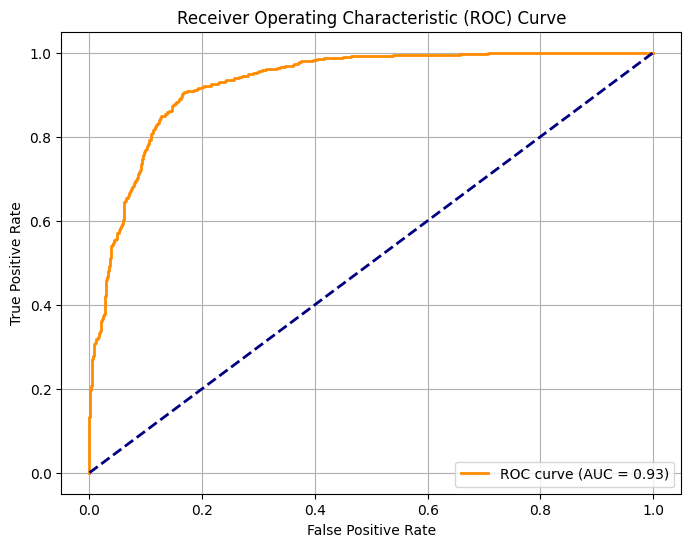

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()